# Power Consumption Tests

## Object
- Figure out power consumption.

# Code:

In [1]:
from enum import IntEnum

import GCode
import GRBL

cnc = GRBL.GRBL(port="/dev/cnc_3018")

print("Laser Mode: {}".format(cnc.laser_mode))

class Tool(IntEnum):
    SPINDLE = 0
    LASER = 1

class LaserPower(IntEnum):
    CONSTANT = 0
    DYNAMIC = 1

LaserPower.CONSTANT

def init(power = LaserPower(0), feed = 200, laser = 25):
    program = GCode.GCode()
    program.G21() # Metric Units
    program.G91() # Absolute positioning.
    program.G1(F=feed) #
    if power==LaserPower.CONSTANT:
        program.M3(S=laser) # Laser settings
    else:
        program.M4(S=laser) # Laser settings
    return program

def end():
    program = GCode.GCode()
    program.M5() # Laser settings.
    return program

def square(size=20):    
    program = GCode.GCode()
    program.G1(X=size)
    program.G1(Y=size)
    program.G1(X=-size)
    program.G1(Y=-size)
    return program

Laser Mode: None


## Test Setup

Power Supply:
- CicuitSpecialists CSI3010SW

Position the paper & other things.

In [24]:
import numpy as np

import matplotlib.pyplot as plt

In [28]:
int(255) == np.uint8(255)

True

In [33]:
def laser_on(pwm):
    if int(pwm) != np.uint8(pwm):
        raise(Exception("UINT8! {}".format(pwm)))
    # Set minimal power setting to focus and position laser
    cnc.cmd("M3 S{:03d}".format(np.uint8(pwm)))
    cnc.cmd("G1 X0 F10") # Laser On
    

def laser_off():
    cnc.cmd("M5") # Laser off

In [32]:
laser_on(1)

In [35]:
laser_off()

In [64]:
voltage = 12
current = list()

results = list()
for laser_pwm in [0, 10, 25, 50, 100, 150, 200, 255]:
    result = dict()
    result["laser_pwm"] = laser_pwm
    result["voltage"] = voltage
    laser_on(laser_pwm)
    result["current"] = input("{}V. PWM: {}. Current Output (A):".format(voltage,laser_pwm))
    results.append(result)
laser_off()
results

12V. PWM: 0. Current Output (A):.26
12V. PWM: 10. Current Output (A):.52
12V. PWM: 25. Current Output (A):.76
12V. PWM: 50. Current Output (A):1.06
12V. PWM: 100. Current Output (A):1.59
12V. PWM: 150. Current Output (A):1.78
12V. PWM: 200. Current Output (A):1.98
12V. PWM: 255. Current Output (A):2.20


[{'current': '.26', 'laser_pwm': 0, 'voltage': 12},
 {'current': '.52', 'laser_pwm': 10, 'voltage': 12},
 {'current': '.76', 'laser_pwm': 25, 'voltage': 12},
 {'current': '1.06', 'laser_pwm': 50, 'voltage': 12},
 {'current': '1.59', 'laser_pwm': 100, 'voltage': 12},
 {'current': '1.78', 'laser_pwm': 150, 'voltage': 12},
 {'current': '1.98', 'laser_pwm': 200, 'voltage': 12},
 {'current': '2.20', 'laser_pwm': 255, 'voltage': 12}]

In [65]:
import json

with open("power_consumption_12V.json", "w") as fid:
    print(json.dumps(results), file=fid)

In [66]:
%matplotlib inline

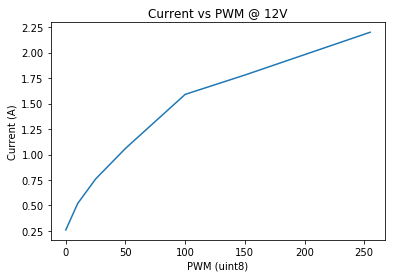

In [67]:
PWM = [result["laser_pwm"] for result in results]
CURRENT = [result["current"] for result in results]

plot = plt.plot(PWM, CURRENT)
plt.xlabel("PWM (uint8)")
plt.ylabel("Current (A)")
plt.title("Current vs PWM @ {}V".format(voltage))

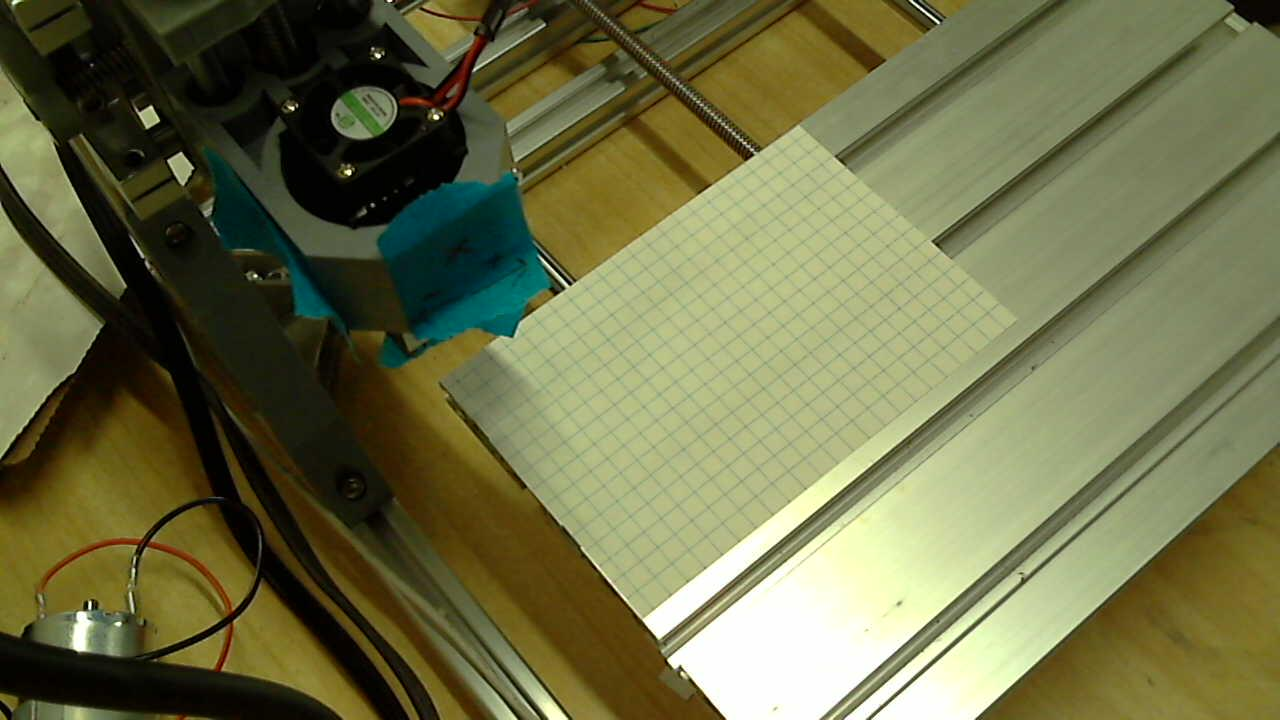

In [1]:
from utils import picture

picture()